# Setup and data checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("team-a-cleaned.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Columns: 134 entries, formula to mode SpaceGroupNumber
dtypes: float64(133), object(1)
memory usage: 4.7+ MB


,gap expt,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,range MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
count,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,...,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000
mean,0.975951,19.228714,57.927454,38.698740,34.230469,13.371024,26.705039,32.283015,83.589705,51.306690,...,0.158220,0.049350,0.055078,0.028957,84.663988,215.675500,131.011512,139.222983,51.704132,103.642485
std,1.445034,14.773650,18.997603,19.996867,15.478990,7.709092,20.073282,26.626888,9.125979,27.339423,...,0.489748,0.182629,0.179156,0.214866,78.537591,25.161349,79.841983,55.662119,34.338127,86.516199
min,0.000000,1.000000,5.000000,1.000000,3.750000,0.035964,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,8.000000,0.000000,2.000000
25%,0.000000,8.000000,46.000000,22.000000,22.666667,7.487322,8.000000,8.000000,79.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,217.000000,42.000000,93.843750,16.023438,14.000000
50%,0.000000,15.000000,57.000000,38.000000,32.166923,12.187500,17.000000,25.000000,87.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,225.000000,159.000000,129.191111,53.663207,70.000000
75%,1.812500,30.000000,75.000000,53.000000,44.000000,18.444444,34.000000,55.000000,89.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,166.000000,229.000000,213.000000,194.000000,83.661690,194.000000
max,11.700000,83.000000,92.000000,91.000000,86.857143,42.000000,92.000000,94.000000,102.000000,95.000000,...,2.110663,1.912788,1.055331,2.110663,229.000000,229.000000,227.000000,229.000000,113.500000,229.000000


In [2]:
print(f" Number of duplicated formulas: {df['formula'].duplicated().sum()}") #check for duplicated formulas
print(f'Number of missing values: {df.isna().mean().sort_values(ascending=False).sum()}') #check for missing values

 Number of duplicated formulas: 0
Number of missing values: 0.0


# Explore the target: gap expt

### This should tell us how hard the regression is and what metrics make sense.

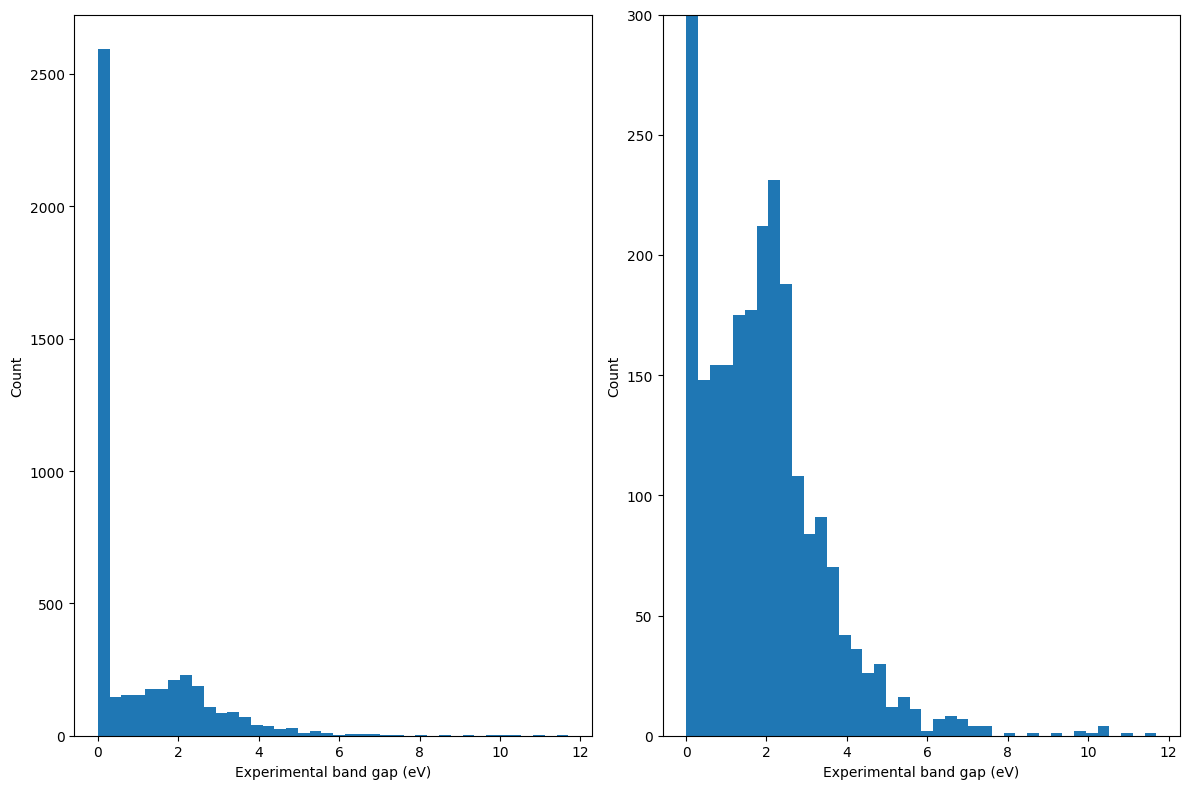

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].hist(df['gap expt'].dropna(), bins=40)
axes[0].set_xlabel("Experimental band gap (eV)")
axes[0].set_ylabel("Count")
axes[1].hist(df['gap expt'].dropna(), bins=40)
axes[1].set_xlabel("Experimental band gap (eV)")
axes[1].set_ylabel("Count")
axes[1].set_ylim(0, 300)
plt.tight_layout()
plt.show()

As you can see, the majority of compounds have a band gap of 0. 

The band gap reflects the overlap and separation of filled vs. empty electronic states, and is controlled jointly by composition, structure, and electronic environment.

In this dataset, the abundance of conductive materials is likely because most of the materials are metallic or degenerate semiconductors, rather than intrinsic ones. IE the metal-non metal interaction bands too weak to induce a valence band- conduction band gap.

### Univariate feature exploration

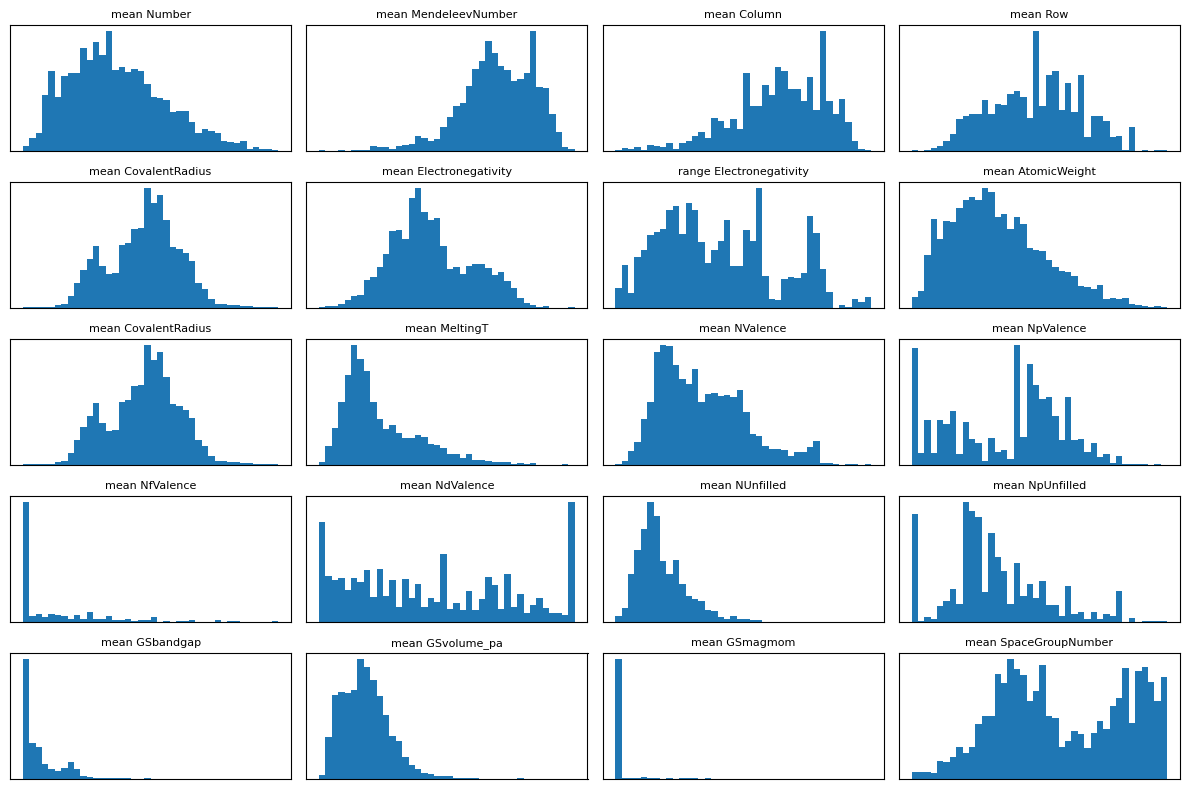

In [4]:
import math

cols_to_plot = [
    'mean Number','mean MendeleevNumber','mean Column','mean Row','mean CovalentRadius',
    'mean Electronegativity', 'range Electronegativity',
    'mean AtomicWeight', 'mean CovalentRadius',
    'mean MeltingT', 'mean NValence', 'mean NpValence','mean NfValence', 'mean NdValence',
    'mean NUnfilled', 'mean NpUnfilled', 'mean GSbandgap', 'mean GSvolume_pa',
    'mean GSmagmom', 'mean SpaceGroupNumber'
]

n_cols = 4  # how many plots per row
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # flatten 2D → 1D indexable list

for ax, c in zip(axes, cols_to_plot):
    df[c].hist(bins=40, ax=ax)
    ax.set_title(c, fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any empty subplots
for ax in axes[len(cols_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

I displayed the distributions for the means of most of the factors. Most of them are distributed fairly evenly over a large range, which should be good for ML regression. NfValence GSmagmon are the only factors which are heavily skewed and likely won't offer much predictive utility. 

### Direct relationships with the target

In [5]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.drop('gap expt')
corr_pearson = df[num_cols].corrwith(df['gap expt'])
corr_spearman = df[num_cols].corrwith(df['gap expt'], method='spearman')

corr_df = pd.DataFrame({
    'pearson': corr_pearson,
    'spearman': corr_spearman
}).sort_values('pearson', key=abs, ascending=False)
corr_df.head(30)

,pearson,spearman
mean NpValence,0.458913,0.544991
mean SpaceGroupNumber,-0.439529,-0.475923
maximum NpValence,0.422002,0.507521
mode SpaceGroupNumber,-0.414991,-0.387203
mean MeltingT,-0.405884,-0.502850
mode NpValence,0.394536,0.460731
range NpValence,0.389805,0.428261
minimum SpaceGroupNumber,-0.387766,-0.370574
maximum MendeleevNumber,0.373902,0.534549
range SpaceGroupNumber,0.362233,0.347913


This simple test shows the most important features when making simple 1-factor regression models.

Pearson correlation is a statistical method that measures the linear relationship between two quantitative variables, ranging from -1 to +1. A value of (+1) indicates a perfect positive linear relationship, (-1) indicates a perfect negative linear relationship, and (0) indicates no linear relationship.

Spearman correlation is a statistical measure that assesses the strength and direction of a monotonic relationship between two ranked variables. It is a non-parametric test, meaning it does not assume the data follows a specific distribution, and it is less sensitive to outliers than Pearson correlation. 




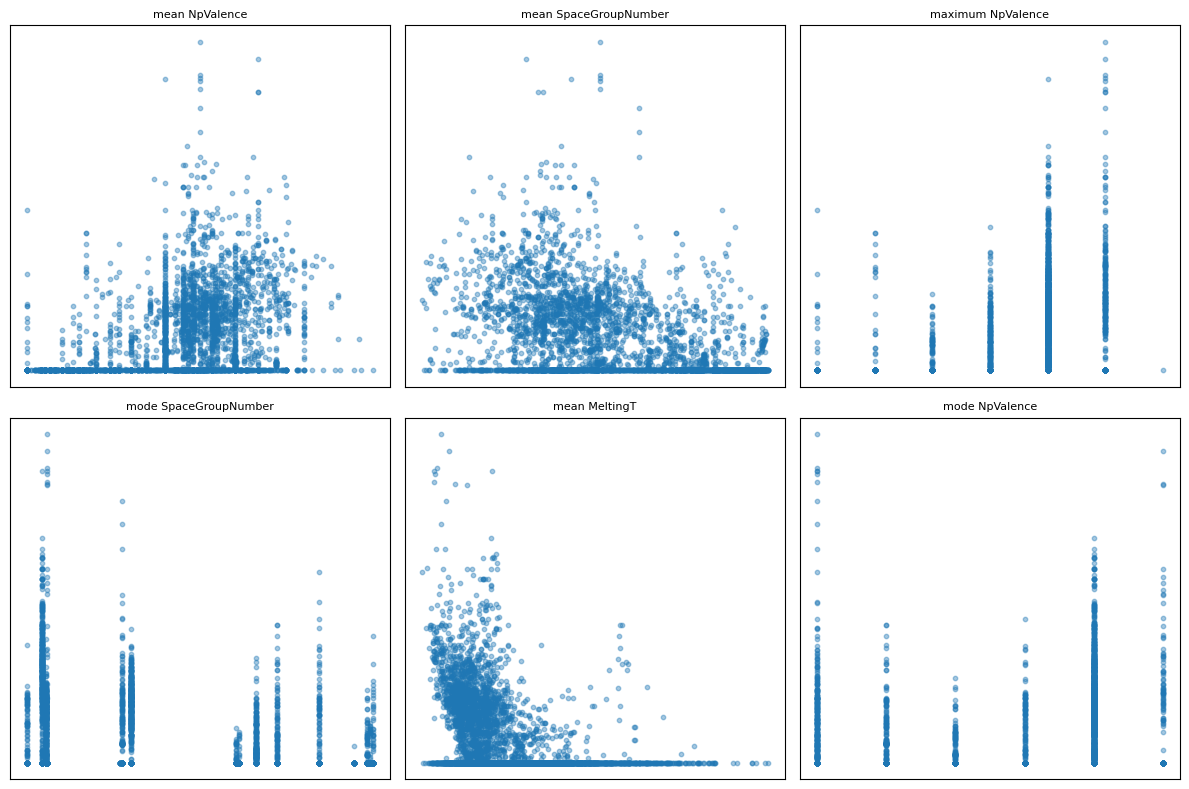

In [6]:
cols_to_plot = corr_df.index[:6]

n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for ax, c in zip(axes, cols_to_plot):
    ax.scatter(df[c],df['gap expt'], alpha=0.4, s=10)
    ax.set_title(c, fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

# Hide unused axes
for ax in axes[len(cols_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### ... but even the most correlated features aren't very useful when taken alone.

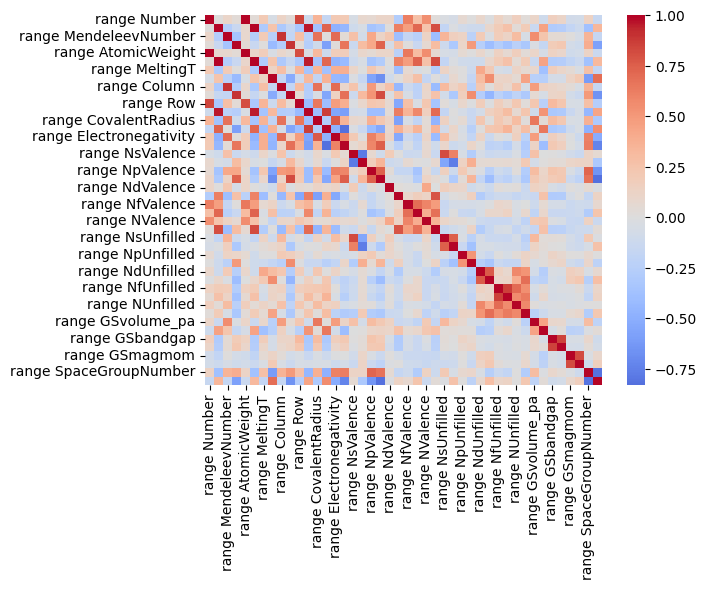

In [7]:
import seaborn as sns

subset_cols = [c for c in num_cols if ('mean ' in c or 'range ' in c)]
corr_matrix = df[subset_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.show()

Some strong correlation which is to be expected since many of the features are different statistical representations of the same quality. But honestly overall the correlation isnt too bad

# PCA!

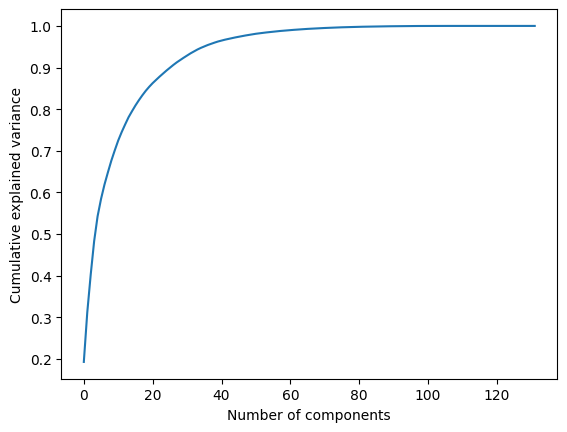

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[num_cols].dropna()   # or use imputation
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

### Elbow point is at about 30 Principle Components


# Training a simple random forrest

In [9]:
df[num_cols].head()

,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,range MendeleevNumber,mean MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
0,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,74.600000,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,163.000000,74.400000,70.0
1,35.0,74.0,39.0,46.714286,15.619048,35.0,51.0,95.0,44.0,81.000000,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,118.809524,73.079365,64.0
2,16.0,82.0,66.0,36.275862,23.552913,16.0,65.0,88.0,23.0,83.482759,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,139.482759,76.670630,70.0
3,32.0,82.0,50.0,46.206897,17.388823,34.0,65.0,89.0,24.0,84.034483,...,0.0,0.0,0.0,0.0,14.0,225.0,211.0,108.586207,104.370987,14.0
4,5.0,47.0,42.0,33.500000,14.250000,47.0,65.0,95.0,30.0,74.250000,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,170.000000,55.000000,225.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = df[num_cols]   # numeric features
y = df['gap expt']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

pred = rf.predict(X_val)
print("R2:", r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))

R2: 0.6712497870394928
MAE: 0.44441964479602913


What is the gini importance of each feature?

In [11]:
imp = rf.feature_importances_
imp_df = pd.DataFrame({'feature': X.columns, 'importance': imp})
imp_df = imp_df.sort_values('importance', ascending=False)
imp_df.head(20)

,feature,importance
57,mean NpValence,0.220298
62,range NdValence,0.041312
108,minimum GSvolume_pa,0.039743
21,mean MeltingT,0.038119
10,avg_dev MendeleevNumber,0.031730
63,mean NdValence,0.027976
28,avg_dev Column,0.027415
46,avg_dev Electronegativity,0.026958
33,mean Row,0.019034
44,range Electronegativity,0.018727


# PCA + XGBoost

In my experience, XGBoost models and PCA work super well together, and are great with messy data

In [12]:
from sklearn.impute import SimpleImputer

  # change path as needed

# --- Separate target and features ---
y = df["gap expt"]
X = df.drop(columns=["gap expt", "formula"], errors="ignore")

# Keep only numeric columns (just in case)
X = X.select_dtypes(include=[np.number])

# --- Handle missing values ---
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# --- Standardise features (very important for PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Run PCA (20 components is enough for your needs) ---
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Build a dataframe with the first 20 PCs
pc_cols = [f"PC{i+1}" for i in range(30)]
pca_df = pd.DataFrame(X_pca[:, :30], columns=pc_cols)

# Add back formula and target for convenience
pca_df["gap expt"] = y.values
if "formula" in df.columns:
    pca_df["formula"] = df["formula"].values

In [13]:
import plotly.express as px

pc3_df = pca_df[["PC1", "PC2", "PC3", "gap expt"]].copy()
if "formula" in pca_df.columns:
    pc3_df["formula"] = pca_df["formula"]

fig = px.scatter_3d(
    pc3_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="gap expt",
    color_continuous_scale="Viridis",
    hover_name="formula" if "formula" in pc3_df.columns else None,
    title="First 3 Principal Components coloured by experimental band gap"
)

fig.update_traces(marker=dict(size=4))
fig.show()

Train an xgboost model on first 30 PCs

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# --- Features: first 30 PCs ---
X_pc = pca_df[pc_cols].values
y = pca_df["gap expt"].values

X_train, X_test, y_train, y_test = train_test_split(
    X_pc, y, test_size=0.2, random_state=42
)

# --- XGBoost model ---
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

RMSE: 0.912
R²:   0.613


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

